# Logistic Regression in python

###### We will load the Titanic dataset from "https://www.kaggle.com/c/titanic/data", train a logistic regression model on it and try to predict if a passenger would survive or not based on various features such as age, gender, class etc.

## Data cleaning

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Read the Titanic Dataset
Record_train = pd.read_csv('titanic_train.csv', sep=',',index_col=0)
Record_test = pd.read_csv('titanic_test.csv', sep=',',index_col=0)

# Combine the training and testing sets
frame = [Record_train, Record_test]
Record = pd.concat(frame, sort=True)

# Perform some basic pre-processing
Record.dropna(inplace=True)
Record.drop('Cabin', axis=1, inplace=True)
Record.sample(8)


,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,
868,31.0,S,50.4958,"Roebling, Mr. Washington Augustus II",0,1,male,0,0.0,PC 17590
521,30.0,S,93.5000,"Perreault, Miss. Anne",0,1,female,0,1.0,12749
545,50.0,C,106.4250,"Douglas, Mr. Walter Donald",0,1,male,1,0.0,PC 17761
292,19.0,C,91.0792,"Bishop, Mrs. Dickinson H (Helen Walton)",0,1,female,1,1.0,11967
718,27.0,S,10.5000,"Troutt, Miss. Edwina Celia ""Winnie""",0,2,female,0,1.0,34218
682,27.0,C,76.7292,"Hassab, Mr. Hammad",0,1,male,0,1.0,PC 17572
196,58.0,C,146.5208,"Lurette, Miss. Elise",0,1,female,0,1.0,PC 17569
258,30.0,S,86.5000,"Cherry, Miss. Gladys",0,1,female,0,1.0,110152


## Verfication of Assumptions

### Checking missing values

In [76]:
print(Record.isnull().sum())

Age         0
Embarked    0
Fare        0
Name        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
Ticket      0
dtype: int64


In [77]:
print(Record.isnull().any())

Age         False
Embarked    False
Fare        False
Name        False
Parch       False
Pclass      False
Sex         False
SibSp       False
Survived    False
Ticket      False
dtype: bool


In [78]:
Record.isnull().sum().any() # Checking if any Null values

False

### Target Vairable is Binary

In [79]:
Record.Survived.unique()

array([1., 0.])

** Our target variable is binary - just tow categories **

Walked    123
Died       60
Name: Survived_text, dtype: int64


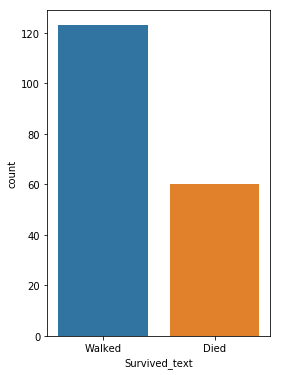

In [80]:
plt.figure(figsize=(4,6))
tempRecord = pd.DataFrame()
tempRecord['Survived_text'] = Record.Survived.replace({1 : 'Walked', 0 : 'Died'})
print(tempRecord.Survived_text.value_counts())
sns.countplot(x='Survived_text', data = tempRecord)

### Independent (Predictor variables) are independent of each other

               Age      Fare     Parch    Pclass     SibSp  Survived
Age       1.000000 -0.092424 -0.271271 -0.306514 -0.156162 -0.254085
Fare     -0.092424  1.000000  0.389740 -0.315235  0.286433  0.134241
Parch    -0.271271  0.389740  1.000000  0.047496  0.255346  0.023582
Pclass   -0.306514 -0.315235  0.047496  1.000000 -0.103592 -0.034542
SibSp    -0.156162  0.286433  0.255346 -0.103592  1.000000  0.106346
Survived -0.254085  0.134241  0.023582 -0.034542  0.106346  1.000000


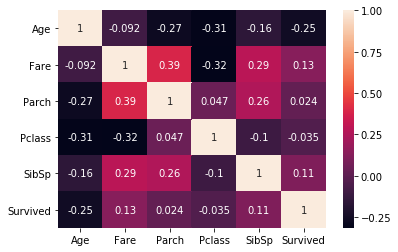

In [133]:
print(Record.corr(method='pearson'))
sns.heatmap(Record.corr(method='pearson'), annot=True)

## Atleast 50 observations per predictor variable

In [82]:
Record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 2 to 890
Data columns (total 10 columns):
Age         183 non-null float64
Embarked    183 non-null object
Fare        183 non-null float64
Name        183 non-null object
Parch       183 non-null int64
Pclass      183 non-null int64
Sex         183 non-null object
SibSp       183 non-null int64
Survived    183 non-null float64
Ticket      183 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 15.7+ KB


## Creating Dummy Variables

In [83]:
# Encode the Sex column as binary 

Sex = pd.get_dummies(Record['Sex'], drop_first=True)
Sex.sample(10)

,male
PassengerId,
708,1
253,1
716,1
780,0
124,0
622,1
663,1
711,0
274,1


In [84]:
print(Record.Embarked.unique())
Embarked = pd.get_dummies(Record['Embarked'], drop_first=True)
Embarked.sample(6)

['C' 'S' 'Q']


,Q,S
PassengerId,,
338,0,0
292,0,0
461,0,1
619,0,1
516,0,1
300,0,0


## Creating final Dataframe

In [85]:
data = pd.concat([Record.drop(['Sex','Embarked','Ticket','Name'], axis=1), Sex, Embarked], axis=1)

In [86]:
data.sample(n=5)

,Age,Fare,Parch,Pclass,SibSp,Survived,male,Q,S
PassengerId,,,,,,,,,
648,56.0,35.5000,0,1,0,1.0,1,0,0
592,52.0,78.2667,0,1,1,1.0,0,0,0
11,4.0,16.7000,1,3,1,1.0,0,0,1
253,62.0,26.5500,0,1,0,0.0,1,0,1
137,19.0,26.2833,2,1,0,1.0,0,0,1


In [87]:
data.male.value_counts()

1    95
0    88
Name: male, dtype: int64

## Data Visulalization

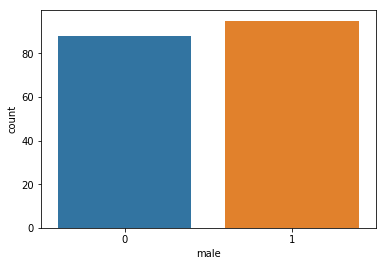

In [88]:
sns.countplot(data['male']);

1    158
2     15
3     10
Name: Pclass, dtype: int64


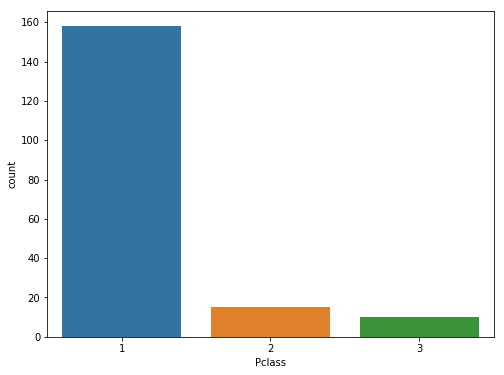

In [89]:
print(data.Pclass.value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data['Pclass']);

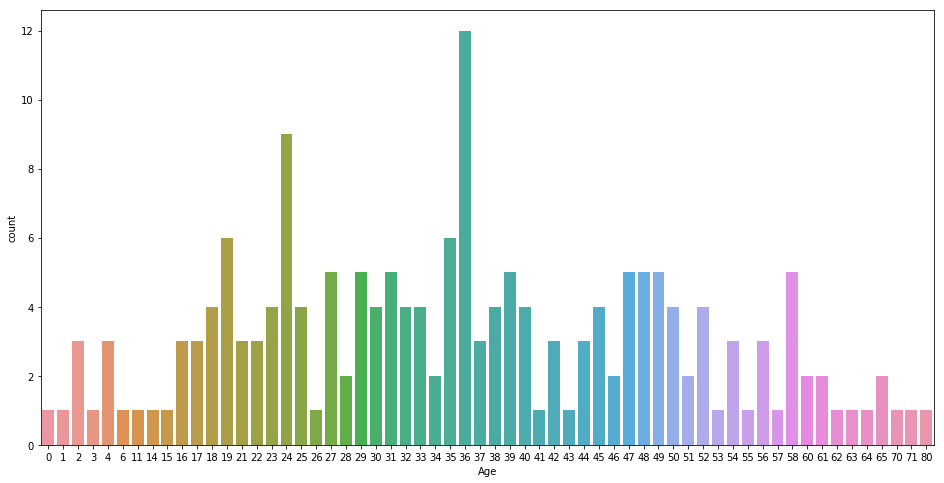

In [90]:
plt.figure(figsize=(16,8))
plt.xticks()
sns.countplot(data['Age'].astype(int))
plt.show()

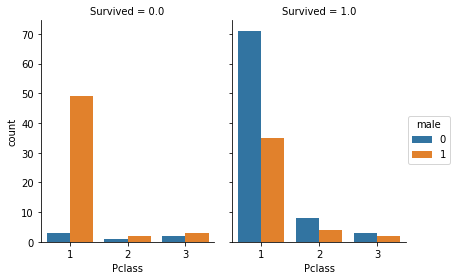

In [91]:
sns.factorplot(x="Pclass", hue="male", col="Survived", data=data, kind="count", size=4, aspect=.7)

## Logistic regression Algorithm

In [92]:
X = data.drop(['Survived'], axis=1)
Y = data['Survived']

In [93]:
Y.head(n=5)

PassengerId
2     1.0
4     1.0
7     0.0
11    1.0
12    1.0
Name: Survived, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

In [95]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Prediction and Evaluation

In [96]:
Prediction = LR.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: {}".format(accuracy_score(Y_test, Prediction)))

Accuracy: 0.6909090909090909


In [101]:
print(classification_report(Y_test, Prediction))

             precision    recall  f1-score   support

        0.0       0.59      0.50      0.54        20
        1.0       0.74      0.80      0.77        35

avg / total       0.68      0.69      0.68        55



In [128]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Prediction)
print(cm)

[[10 10]
 [ 7 28]]


Text(33,0.5,'Predicted Labels')

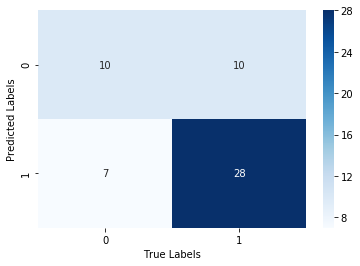

In [129]:
sns.heatmap(cm, cmap='Blues', annot=True)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")